<a href="https://colab.research.google.com/github/Faiqulilmi16/Thesis/blob/main/Klasifikasi_Opennes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Model Kepribadian

In [ ]:
!pip install PyDrive

## Ambil Data dari Drive

In [ ]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
download = drive.CreateFile({'id': '1bl8zVvsazifuXNvjENo8f5cabDACKI2K'})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!unzip "/content/drive/MyDrive/Datatrain1.zip"

Archive:  Datatrain1.zip
   creating: Datatrain1/A/
 extracting: Datatrain1/A/datatrain001.png  
 extracting: Datatrain1/A/datatrain002.png  
  inflating: Datatrain1/A/datatrain003.png  
  inflating: Datatrain1/A/datatrain004.png  
  inflating: Datatrain1/A/datatrain005.png  
  inflating: Datatrain1/A/datatrain006.png  
  inflating: Datatrain1/A/datatrain007.png  
  inflating: Datatrain1/A/datatrain008.png  
 extracting: Datatrain1/A/datatrain009.png  
  inflating: Datatrain1/A/datatrain010.png  
  inflating: Datatrain1/A/datatrain011.png  
  inflating: Datatrain1/A/datatrain012.png  
  inflating: Datatrain1/A/datatrain013.png  
  inflating: Datatrain1/A/datatrain014.png  
  inflating: Datatrain1/A/datatrain015.png  
  inflating: Datatrain1/A/datatrain016.png  
  inflating: Datatrain1/A/datatrain017.png  
  inflating: Datatrain1/A/datatrain018.png  
  inflating: Datatrain1/A/datatrain019.png  
  inflating: Datatrain1/A/datatrain020.png  
  inflating: Datatrain1/A/datatrain021.png  
  i

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

## Jumlah Data Train



In [ ]:
train_labels = pd.read_csv('/content/Datatrain1/opennes.csv')
train_labels.head()

,id,labels,Rendah,Sedang,Tinggi
0,datatrain001,"[""Tinggi""]",0,0,1
1,datatrain002,"[""Tinggi""]",0,0,1
2,datatrain003,"[""Tinggi""]",0,0,1
3,datatrain004,"[""Tinggi""]",0,0,1
4,datatrain005,"[""Tinggi""]",0,0,1


In [ ]:
train_labels.columns

Index(['id', 'labels', 'Rendah', 'Sedang', 'Tinggi'], dtype='object')

## Menampilkan data gambar

In [ ]:
train_image = []
for i in tqdm(range(train_labels.shape[0])):
    img = image.load_img('Datatrain1/Z/'+train_labels['id'][i]+'.png',target_size=(200,200,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 105/105 [00:00<00:00, 1176.10it/s]


In [ ]:
X.shape

(105, 200, 200, 3)

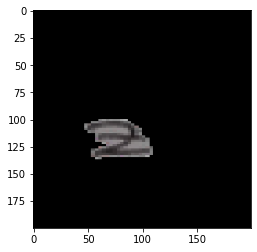

In [ ]:
plt.imshow(X[5])

In [ ]:
y = np.array(train_labels.drop(['id', 'labels'],axis=1))
y.shape

(105, 3)

## Membuat Training dan Testing untuk Regresi

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

## Membuat model

In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(200,200,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 196, 196, 16)      1216      
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 98, 98, 16)        0         
_________________________________________________________________
dropout_96 (Dropout)         (None, 98, 98, 16)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 94, 94, 32)        12832     
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 47, 47, 32)        0         
_________________________________________________________________
dropout_97 (Dropout)         (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 43, 43, 64)      

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop


     |████████████████████████████████| 1.1 MB 12.3 MB/s 


In [ ]:
import tensorflow as tf
from tensorflow.keras import optimizers

f1_metric = tf.keras.metrics.F1Score(average='macro')

# Use the Adam optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',f1_metric, tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])


In [ ]:
from tensorflow.keras.callbacks import Callback

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0.001, patience=2, restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    batch_size=64)

Epoch 1/10
2/2 [==============================] - 2s 532ms/step - loss: 0.6645 - accuracy: 0.4247 - f1_score: 0.3341 - precision_16: 0.4146 - recall_16: 0.4658 - val_loss: 0.4801 - val_accuracy: 0.7812 - val_f1_score: 0.2924 - val_precision_16: 0.8065 - val_recall_16: 0.7812
Epoch 2/10
2/2 [==============================] - 0s 99ms/step - loss: 0.5375 - accuracy: 0.7534 - f1_score: 0.2865 - precision_16: 0.7292 - recall_16: 0.4795 - val_loss: 0.4035 - val_accuracy: 0.7812 - val_f1_score: 0.2924 - val_precision_16: 0.7812 - val_recall_16: 0.7812
Epoch 3/10
2/2 [==============================] - 0s 90ms/step - loss: 0.4899 - accuracy: 0.7671 - f1_score: 0.3547 - precision_16: 0.7705 - recall_16: 0.6438 - val_loss: 0.4395 - val_accuracy: 0.7812 - val_f1_score: 0.2924 - val_precision_16: 0.7812 - val_recall_16: 0.7812
Epoch 4/10
2/2 [==============================] - 0s 89ms/step - loss: 0.5198 - accuracy: 0.7534 - f1_score: 0.2865 - precision_16: 0.6620 - recall_16: 0.6438 - val_loss: 0.5

In [ ]:
img = image.load_img('/content/drive/MyDrive/Datatest/A/datatest20.png',target_size=(200,200,3))
img = image.img_to_array(img)
img = img/255

Tinggi (0.643)


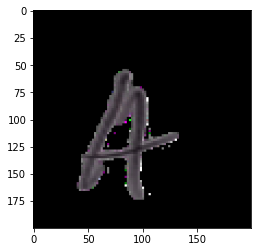

In [ ]:
classes = np.array(train_labels.columns[2:])
proba = model.predict(img.reshape(1,200,200,3))
top_1 = np.argsort(proba[0])[:-2:-1]
for i in range(1):
    print("{}".format(classes[top_1[i]])+" ({:.3})".format(proba[0][top_1[i]]))
plt.imshow(img)